In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import statistics
import seaborn as sb


df=pd.read_csv("data3.csv",sep=";")
#df=pd.DataFrame(df.values[1:], columns=headers)
print(df.columns)

print(df.head())



Index(['ArraySize', ' ThreadsX', ' ThreadsY', ' GridSizeX', ' GridSizeY',
       ' Kernel1', ' Kernel2.1', ' Kernel2.2', ' Kernel1.2', ' HostTime',
       ' HostToDevice', ' DeviceToHost', ' CacheConfiguration', ' GPU',
       'Unnamed: 14'],
      dtype='object')
   ArraySize   ThreadsX   ThreadsY   GridSizeX   GridSizeY   Kernel1  \
0      16384        100          1         164           1   629.678   
1      16384        100          1         164           1   425.536   
2      16384        200          1          82           1   644.068   
3      16384        200          1          82           1   439.934   
4      16384        400          1          41           1   641.952   

    Kernel2.1   Kernel2.2   Kernel1.2   HostTime   HostToDevice  \
0    32.56140     606.388    0.002176    639.145        186.094   
1     9.16918     231.124   79.052800    825.916        102.804   
2    32.52860     606.294    0.001376    639.224        190.445   
3     9.15040     231.413   59.657

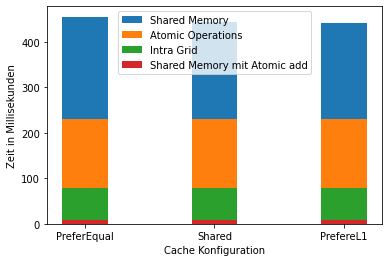

In [2]:
df1=df[(df['ArraySize']==16384) & (df[' GPU']=="GPU01")]
x=df1[" CacheConfiguration"]
y1=df1[" Kernel1"]
y2=df1[" Kernel2.1"]
y3=df1[" Kernel2.2"]
y4=df1[" Kernel1.2"]

new_x, new_y1, new_y2,new_y3,new_y4 = zip(*sorted(zip(x, y1,y2,y3,y4)))
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x, new_y1, width, label='Shared Memory')
rects2 = ax.bar(x,new_y3, width, label="Atomic Operations")
rects2 = ax.bar(x,new_y4, width, label="Intra Grid")
rects2 = ax.bar(x,new_y2, width, label="Shared Memory mit Atomic add")
plt.ylabel('Zeit in Millisekunden')
plt.xlabel('Cache Konfiguration')

plt.legend()


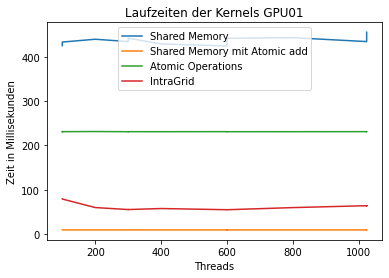

In [3]:
df1=df[(df['ArraySize']==16384) & (df[' GPU']=="GPU01")]
x=df1[" ThreadsX"]
y1=df1[" Kernel1"]
y2=df1[" Kernel2.1"]
y3=df1[" Kernel2.2"]
y4=df1[" Kernel1.2"]

new_x, new_y1, new_y2,new_y3,new_y4 = zip(*sorted(zip(x, y1,y2,y3,y4)))
width = 0.35  # the width of the bars
plt.plot(new_x,new_y1, label="Shared Memory")
plt.plot(new_x,new_y2, label="Shared Memory mit Atomic add")
plt.plot(new_x,new_y3,label="Atomic Operations")
plt.plot(new_x,new_y4,label="IntraGrid")

plt.ylabel('Zeit in Millisekunden')
plt.xlabel('Threads')
plt.title("Laufzeiten der Kernels GPU01")
plt.savefig("Kernels.png")
plt.legend()


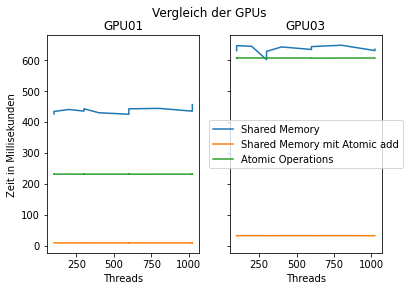

In [4]:
fig, axs = plt.subplots(1, 2,sharey=True)

df1=df[(df['ArraySize']==16384) & (df[' GPU']=="GPU01")]
x=df1[" ThreadsX"]
y1=df1[" Kernel1"]
y2=df1[" Kernel2.1"]
y3=df1[" Kernel2.2"]
y4=df1[" Kernel1.2"]
#plt.ylabel('Zeit in Millisekunden')
#
# plt.xlabel('Threads')
new_x, new_y1, new_y2,new_y3,new_y4 = zip(*sorted(zip(x, y1,y2,y3,y4)))
width = 0.35  # the width of the bars
axs[0].set_title('GPU01')
axs[0].plot(new_x,new_y1, label="Shared Memory")
axs[0].plot(new_x,new_y2, label="Shared Memory mit Atomic add")
axs[0].plot(new_x,new_y3,label="Atomic Operations")
#axs[0].plot(new_x,new_y4,label="IntraGrid")
df2=df[(df['ArraySize']==16384) & (df[' GPU']=="GPU03")]
xd=df2[" ThreadsX"]
y1d=df2[" Kernel1"]
y2d=df2[" Kernel2.1"]
y3d=df2[" Kernel2.2"]
y4d=df2[" Kernel1.2"]
axs[1].set_title('GPU03')
axs[1].set_xlabel('Threads')
axs[0].set_xlabel('Threads')
axs[0].set_ylabel('Zeit in Millisekunden')

new_xd, new_y1d, new_y2d,new_y3d,new_y4d = zip(*sorted(zip(xd, y1d,y2d,y3d,y4d)))
width = 0.35  # the width of the bars
axs[1].plot(new_xd,new_y1d, label="Shared Memory")
axs[1].plot(new_xd,new_y2d, label="Shared Memory mit Atomic add")
axs[1].plot(new_xd,new_y3d,label="Atomic Operations")
##axs[1].plot(new_xd,new_y4d,label="IntraGrid")

fig.suptitle("Vergleich der GPUs")
plt.legend( loc='center')
plt.savefig("gpucomparison.png")


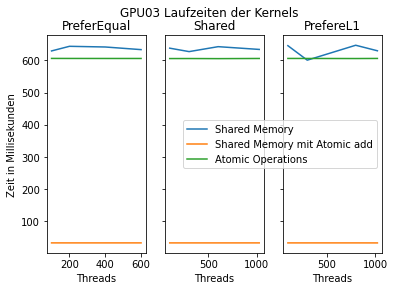

In [5]:
#df=pd.read_csv("data_gpu01.csv",sep=";")


fig, axs = plt.subplots(1, 3,sharey=True)

df1=df[(df['ArraySize']==16384) & (df[' GPU']=="GPU03") & (df[' CacheConfiguration']=="PreferEqual")]
x=df1[" ThreadsX"]
y1=df1[" Kernel1"]
y2=df1[" Kernel2.1"]
y3=df1[" Kernel2.2"]
y4=df1[" Kernel1.2"]
#plt.ylabel('Zeit in Millisekunden')
#
# plt.xlabel('Threads')
new_x, new_y1, new_y2,new_y3,new_y4 = zip(*sorted(zip(x, y1,y2,y3,y4)))
width = 0.35  # the width of the bars
axs[0].set_title('PreferEqual')
axs[0].plot(new_x,new_y1, label="Shared Memory")
axs[0].plot(new_x,new_y2, label="Shared Memory mit Atomic add")
axs[0].plot(new_x,new_y3,label="Atomic Operations")
#axs[0].plot(new_x,new_y4,label="IntraGrid")
df2=df[(df['ArraySize']==16384) & (df[' GPU']=="GPU03") & (df[' CacheConfiguration']=="Shared")]
xd=df2[" ThreadsX"]
y1d=df2[" Kernel1"]
y2d=df2[" Kernel2.1"]
y3d=df2[" Kernel2.2"]
y4d=df2[" Kernel1.2"]
axs[1].set_title('Shared')
axs[1].set_xlabel('Threads')
axs[0].set_xlabel('Threads')
axs[0].set_ylabel('Zeit in Millisekunden')


new_xd, new_y1d, new_y2d,new_y3d,new_y4d = zip(*sorted(zip(xd, y1d,y2d,y3d,y4d)))
width = 0.35  # the width of the bars
axs[1].plot(new_xd,new_y1d, label="Shared Memory")
axs[1].plot(new_xd,new_y2d, label="Shared Memory mit Atomic add")
axs[1].plot(new_xd,new_y3d,label="Atomic Operations")
##axs[1].plot(new_xd,new_y4d,label="IntraGrid")

df2=df[(df['ArraySize']==16384) & (df[' GPU']=="GPU03") & (df[' CacheConfiguration']=="PrefereL1")]
xd=df2[" ThreadsX"]
y1d=df2[" Kernel1"]
y2d=df2[" Kernel2.1"]
y3d=df2[" Kernel2.2"]
y4d=df2[" Kernel1.2"]
axs[2].set_title('PrefereL1')
axs[2].set_xlabel('Threads')
axs[0].set_xlabel('Threads')
axs[0].set_ylabel('Zeit in Millisekunden')

new_xd, new_y1d, new_y2d,new_y3d,new_y4d = zip(*sorted(zip(xd, y1d,y2d,y3d,y4d)))
width = 0.35  # the width of the bars
axs[2].plot(new_xd,new_y1d, label="Shared Memory")
axs[2].plot(new_xd,new_y2d, label="Shared Memory mit Atomic add")
axs[2].plot(new_xd,new_y3d,label="Atomic Operations")

fig.suptitle("GPU03 Laufzeiten der Kernels")
plt.legend( loc='best')
plt.savefig("gpu03")

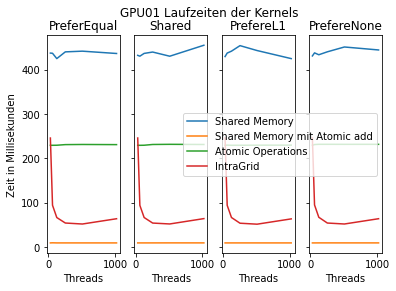

In [6]:
df=pd.read_csv("data_gpu01.csv",sep=";")
fig, axs = plt.subplots(1, 4,sharey=True)

df1=df[(df['ArraySize']==16384) & (df[' GPU']=="GPU01") & (df[' CacheConfiguration']=="PreferEqual")]
x=df1[" ThreadsX"]
y1=df1[" Kernel1"]
y2=df1[" Kernel2.1"]
y3=df1[" Kernel2.2"]
y4=df1[" Kernel1.2"]
#plt.ylabel('Zeit in Millisekunden')
#
# plt.xlabel('Threads')
new_x, new_y1, new_y2,new_y3,new_y4 = zip(*sorted(zip(x, y1,y2,y3,y4)))
width = 0.35  # the width of the bars
axs[0].set_title('PreferEqual')
axs[0].plot(new_x,new_y1, label="Shared Memory")
axs[0].plot(new_x,new_y2, label="Shared Memory mit Atomic add")
axs[0].plot(new_x,new_y3,label="Atomic Operations")
axs[0].plot(new_x,new_y4,label="IntraGrid")

#axs[0].plot(new_x,new_y4,label="IntraGrid")
df2=df[(df['ArraySize']==16384) & (df[' GPU']=="GPU01") & (df[' CacheConfiguration']=="Shared")]
xd=df2[" ThreadsX"]
y1d=df2[" Kernel1"]
y2d=df2[" Kernel2.1"]
y3d=df2[" Kernel2.2"]
y4d=df2[" Kernel1.2"]
axs[1].set_title('Shared')
axs[1].set_xlabel('Threads')
axs[0].set_xlabel('Threads')
axs[0].set_ylabel('Zeit in Millisekunden')


new_xd, new_y1d, new_y2d,new_y3d,new_y4d = zip(*sorted(zip(xd, y1d,y2d,y3d,y4d)))
width = 0.35  # the width of the bars
axs[1].plot(new_xd,new_y1d, label="Shared Memory")
axs[1].plot(new_xd,new_y2d, label="Shared Memory mit Atomic add")
axs[1].plot(new_xd,new_y3d,label="Atomic Operations")
axs[1].plot(new_xd,new_y4d,label="IntraGrid")

df2=df[(df['ArraySize']==16384) & (df[' GPU']=="GPU01") & (df[' CacheConfiguration']=="PrefereL1")]
xd=df2[" ThreadsX"]
y1d=df2[" Kernel1"]
y2d=df2[" Kernel2.1"]
y3d=df2[" Kernel2.2"]
y4d=df2[" Kernel1.2"]
axs[2].set_title('PrefereL1')
axs[2].set_xlabel('Threads')
axs[0].set_xlabel('Threads')
axs[0].set_ylabel('Zeit in Millisekunden')

new_xd, new_y1d, new_y2d,new_y3d,new_y4d = zip(*sorted(zip(xd, y1d,y2d,y3d,y4d)))
width = 0.35  # the width of the bars
axs[2].plot(new_xd,new_y1d, label="Shared Memory")
axs[2].plot(new_xd,new_y2d, label="Shared Memory mit Atomic add")
axs[2].plot(new_xd,new_y3d,label="Atomic Operations")
axs[2].plot(new_xd,new_y4d,label="IntraGrid")


df2=df[(df['ArraySize']==16384) & (df[' GPU']=="GPU01") & (df[' CacheConfiguration']=="PrefereNone")]
xd=df2[" ThreadsX"]
y1d=df2[" Kernel1"]
y2d=df2[" Kernel2.1"]
y3d=df2[" Kernel2.2"]
y4d=df2[" Kernel1.2"]
axs[3].set_title('PrefereNone')
axs[3].set_xlabel('Threads')
axs[0].set_xlabel('Threads')
axs[0].set_ylabel('Zeit in Millisekunden')

new_xd, new_y1d, new_y2d,new_y3d,new_y4d = zip(*sorted(zip(xd, y1d,y2d,y3d,y4d)))
width = 0.35  # the width of the bars
axs[3].plot(new_xd,new_y1d, label="Shared Memory")
axs[3].plot(new_xd,new_y2d, label="Shared Memory mit Atomic add")
axs[3].plot(new_xd,new_y3d,label="Atomic Operations")
axs[3].plot(new_xd,new_y4d,label="IntraGrid")
fig.suptitle("GPU01 Laufzeiten der Kernels")

plt.legend( loc='center right')
plt.savefig("times_gpu01.png")

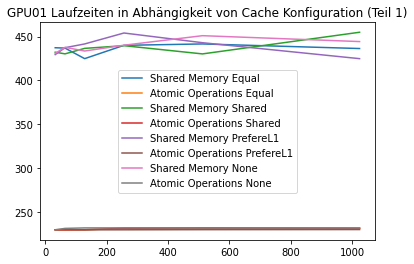

In [7]:
#fig, axs = plt.subplots(sharey=True)
df=pd.read_csv("data_gpu01.csv",sep=";")

df1=df[(df['ArraySize']==16384) & (df[' GPU']=="GPU01") & (df[' CacheConfiguration']=="PreferEqual")]
x=df1[" ThreadsX"]
y1=df1[" Kernel1"]
y2=df1[" Kernel2.1"]
y3=df1[" Kernel2.2"]
y4=df1[" Kernel1.2"]
#plt.ylabel('Zeit in Millisekunden')
#
# plt.xlabel('Threads')
new_x, new_y1, new_y2,new_y3,new_y4 = zip(*sorted(zip(x, y1,y2,y3,y4)))
width = 0.35  # the width of the bars
#axs[0].set_title('PreferEqual')
plt.plot(new_x,new_y1, label="Shared Memory Equal")
#plt.plot(new_x,new_y2, label="Shared Memory mit Atomic add Equal")
plt.plot(new_x,new_y3,label="Atomic Operations Equal")
#plt.plot(new_x,new_y4,label="IntraGrid Equal")

#axs[0].plot(new_x,new_y4,label="IntraGrid")
df2=df[(df['ArraySize']==16384) & (df[' GPU']=="GPU01") & (df[' CacheConfiguration']=="Shared")]
xd=df2[" ThreadsX"]
y1d=df2[" Kernel1"]
y2d=df2[" Kernel2.1"]
y3d=df2[" Kernel2.2"]
y4d=df2[" Kernel1.2"]
#axs[1].set_title('Shared')
#axs[1].set_xlabel('Threads')
#axs[0].set_xlabel('Threads')
#axs[0].set_ylabel('Zeit in Millisekunden')


new_xd, new_y1d, new_y2d,new_y3d,new_y4d = zip(*sorted(zip(xd, y1d,y2d,y3d,y4d)))
width = 0.35  # the width of the bars
plt.plot(new_xd,new_y1d, label="Shared Memory Shared")
#plt.plot(new_xd,new_y2d, label="Shared Memory mit Atomic add Shared")
plt.plot(new_xd,new_y3d,label="Atomic Operations Shared")
#plt.plot(new_xd,new_y4d,label="IntraGrid Shared")

##axs[1].plot(new_xd,new_y4d,label="IntraGrid")

df2=df[(df['ArraySize']==16384) & (df[' GPU']=="GPU01") & (df[' CacheConfiguration']=="PrefereL1")]
xd=df2[" ThreadsX"]
y1d=df2[" Kernel1"]
y2d=df2[" Kernel2.1"]
y3d=df2[" Kernel2.2"]
y4d=df2[" Kernel1.2"]
#axs[2].set_title('PrefereL1')
#axs[2].set_xlabel('Threads')


new_xd, new_y1d, new_y2d,new_y3d,new_y4d = zip(*sorted(zip(xd, y1d,y2d,y3d,y4d)))
width = 0.35  # the width of the bars
plt.plot(new_xd,new_y1d, label="Shared Memory PrefereL1")
#plt.plot(new_xd,new_y2d, label="Shared Memory mit Atomic add PrefereL1")
plt.plot(new_xd,new_y3d,label="Atomic Operations PrefereL1")
#plt.plot(new_xd,new_y4d,label="IntraGrid PrefereL1")

df2=df[(df['ArraySize']==16384) & (df[' GPU']=="GPU01") & (df[' CacheConfiguration']=="PrefereNone")]
xd=df2[" ThreadsX"]
y1d=df2[" Kernel1"]
y2d=df2[" Kernel2.1"]
y3d=df2[" Kernel2.2"]
y4d=df2[" Kernel1.2"]
#axs[2].set_title('PrefereL1')
#axs[2].set_xlabel('Threads')
#axs[0].set_xlabel('Threads')
#axs[0].set_ylabel('Zeit in Millisekunden')

new_xd, new_y1d, new_y2d,new_y3d,new_y4d = zip(*sorted(zip(xd, y1d,y2d,y3d,y4d)))
width = 0.35  # the width of the bars
plt.plot(new_xd,new_y1d, label="Shared Memory None")
#plt.plot(new_xd,new_y2d, label="Shared Memory mit Atomic add None")
plt.plot(new_xd,new_y3d,label="Atomic Operations None")
#plt.plot(new_xd,new_y4d,label="IntraGrid None")

plt.title("GPU01 Laufzeiten in Abhängigkeit von Cache Konfiguration (Teil 1)")

plt.legend( loc='center')
plt.savefig("caches1.png")

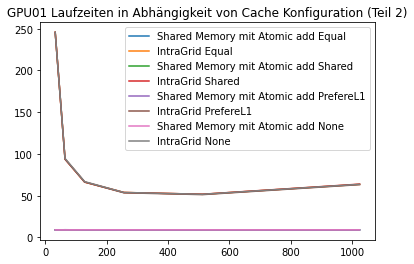

In [8]:
#fig, axs = plt.subplots(sharey=True)
df=pd.read_csv("data_gpu01.csv",sep=";")

df1=df[(df['ArraySize']==16384) & (df[' GPU']=="GPU01") & (df[' CacheConfiguration']=="PreferEqual")]
x=df1[" ThreadsX"]
y1=df1[" Kernel1"]
y2=df1[" Kernel2.1"]
y3=df1[" Kernel2.2"]
y4=df1[" Kernel1.2"]
#plt.ylabel('Zeit in Millisekunden')
#
# plt.xlabel('Threads')
new_x, new_y1, new_y2,new_y3,new_y4 = zip(*sorted(zip(x, y1,y2,y3,y4)))
width = 0.35  # the width of the bars
#axs[0].set_title('PreferEqual')
#plt.plot(new_x,new_y1, label="Shared Memory Equal")
plt.plot(new_x,new_y2, label="Shared Memory mit Atomic add Equal")
#plt.plot(new_x,new_y3,label="Atomic Operations Equal")
plt.plot(new_x,new_y4,label="IntraGrid Equal")

#axs[0].plot(new_x,new_y4,label="IntraGrid")
df2=df[(df['ArraySize']==16384) & (df[' GPU']=="GPU01") & (df[' CacheConfiguration']=="Shared")]
xd=df2[" ThreadsX"]
y1d=df2[" Kernel1"]
y2d=df2[" Kernel2.1"]
y3d=df2[" Kernel2.2"]
y4d=df2[" Kernel1.2"]
#axs[1].set_title('Shared')
#axs[1].set_xlabel('Threads')
#axs[0].set_xlabel('Threads')
#axs[0].set_ylabel('Zeit in Millisekunden')


new_xd, new_y1d, new_y2d,new_y3d,new_y4d = zip(*sorted(zip(xd, y1d,y2d,y3d,y4d)))
width = 0.35  # the width of the bars
#plt.plot(new_xd,new_y1d, label="Shared Memory Shared")
plt.plot(new_xd,new_y2d, label="Shared Memory mit Atomic add Shared")
#plt.plot(new_xd,new_y3d,label="Atomic Operations Shared")
plt.plot(new_xd,new_y4d,label="IntraGrid Shared")

##axs[1].plot(new_xd,new_y4d,label="IntraGrid")

df2=df[(df['ArraySize']==16384) & (df[' GPU']=="GPU01") & (df[' CacheConfiguration']=="PrefereL1")]
xd=df2[" ThreadsX"]
y1d=df2[" Kernel1"]
y2d=df2[" Kernel2.1"]
y3d=df2[" Kernel2.2"]
y4d=df2[" Kernel1.2"]
#axs[2].set_title('PrefereL1')
#axs[2].set_xlabel('Threads')


new_xd, new_y1d, new_y2d,new_y3d,new_y4d = zip(*sorted(zip(xd, y1d,y2d,y3d,y4d)))
width = 0.35  # the width of the bars
#plt.plot(new_xd,new_y1d, label="Shared Memory PrefereL1")
plt.plot(new_xd,new_y2d, label="Shared Memory mit Atomic add PrefereL1")
#plt.plot(new_xd,new_y3d,label="Atomic Operations PrefereL1")
plt.plot(new_xd,new_y4d,label="IntraGrid PrefereL1")

df2=df[(df['ArraySize']==16384) & (df[' GPU']=="GPU01") & (df[' CacheConfiguration']=="PrefereNone")]
xd=df2[" ThreadsX"]
y1d=df2[" Kernel1"]
y2d=df2[" Kernel2.1"]
y3d=df2[" Kernel2.2"]
y4d=df2[" Kernel1.2"]
#axs[2].set_title('PrefereL1')
#axs[2].set_xlabel('Threads')
#axs[0].set_xlabel('Threads')
#axs[0].set_ylabel('Zeit in Millisekunden')

new_xd, new_y1d, new_y2d,new_y3d,new_y4d = zip(*sorted(zip(xd, y1d,y2d,y3d,y4d)))
width = 0.35  # the width of the bars
#plt.plot(new_xd,new_y1d, label="Shared Memory None")
plt.plot(new_xd,new_y2d, label="Shared Memory mit Atomic add None")
#plt.plot(new_xd,new_y3d,label="Atomic Operations None")
plt.plot(new_xd,new_y4d,label="IntraGrid None")

plt.title("GPU01 Laufzeiten in Abhängigkeit von Cache Konfiguration (Teil 2)")


plt.legend( loc='upper right')
plt.savefig("chaches2.png")

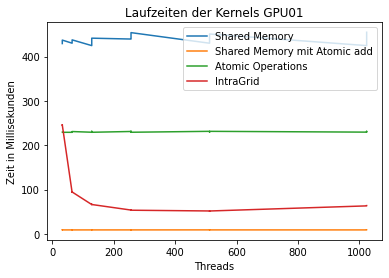

In [9]:
df1=df[(df['ArraySize']==16384) & (df[' GPU']=="GPU01")]
x=df1[" ThreadsX"]
y1=df1[" Kernel1"]
y2=df1[" Kernel2.1"]
y3=df1[" Kernel2.2"]
y4=df1[" Kernel1.2"]

new_x, new_y1, new_y2,new_y3,new_y4 = zip(*sorted(zip(x, y1,y2,y3,y4)))
width = 0.35  # the width of the bars
plt.plot(new_x,new_y1, label="Shared Memory")
plt.plot(new_x,new_y2, label="Shared Memory mit Atomic add")
plt.plot(new_x,new_y3,label="Atomic Operations")
plt.plot(new_x,new_y4,label="IntraGrid")

plt.ylabel('Zeit in Millisekunden')
plt.xlabel('Threads')
plt.title("Laufzeiten der Kernels GPU01")
plt.legend()
plt.savefig("Kernels.png")
